# RN Project-Universal Sentence Encoder

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re # regular expression
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib

In [2]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [3]:
# Import the Universal Sentence Encoder's TF Hub module
# My TF Hub module cache folder "C:\Users\AIKBENGN\AppData\Local\Temp\tfhub_modules"
embed = hub.Module(module_url)

INFO:tensorflow:Using C:\Users\AIKBENGN\AppData\Local\Temp\tfhub_modules to cache modules.
INFO:tensorflow:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-large/3'.
INFO:tensorflow:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-large/3'.
INFO:tensorflow:Initialize variable module/Embeddings_en/sharded_0:0 from checkpoint b'C:\\Users\\AIKBENGN\\AppData\\Local\\Temp\\tfhub_modules\\96e8f1d3d4d90ce86b2db128249eb8143a91db73\\variables\\variables' with Embeddings_en/sharded_0
INFO:tensorflow:Initialize variable module/Embeddings_en/sharded_1:0 from checkpoint b'C:\\Users\\AIKBENGN\\AppData\\Local\\Temp\\tfhub_modules\\96e8f1d3d4d90ce86b2db128249eb8143a91db73\\variables\\variables' with Embeddings_en/sharded_1
INFO:tensorflow:Initialize variable module/Embeddings_en/sharded_10:0 from checkpoint b'C:\\Users\\AIKBENGN\\AppData\\Local\\Temp\\tfhub_modules\\96e8f1d3d4d90ce86b2db128249eb8143a91db73\\variables\\variables' with Embedding

INFO:tensorflow:Initialize variable module/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_0/self_attention/multihead_attention/q/kernel:0 from checkpoint b'C:\\Users\\AIKBENGN\\AppData\\Local\\Temp\\tfhub_modules\\96e8f1d3d4d90ce86b2db128249eb8143a91db73\\variables\\variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_0/self_attention/multihead_attention/q/kernel
INFO:tensorflow:Initialize variable module/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_0/self_attention/multihead_attention/v/kernel:0 from checkpoint b'C:\\Users\\AIKBENGN\\AppData\\Local\\Temp\\tfhub_modules\\96e8f1d3d4d90ce86b2db128249eb8143a91db73\\variables\\variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_0/self_attention/multihead_attention/v/kernel
INFO:tensorflow:Initialize variable module/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_1/ffn/conv1/bias:0 from checkpoint b'C:\\Users\\AIKBENGN\\AppData\\Local\\Temp\\tfhub_modules\\96e

INFO:tensorflow:Initialize variable module/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_2/self_attention/multihead_attention/k/kernel:0 from checkpoint b'C:\\Users\\AIKBENGN\\AppData\\Local\\Temp\\tfhub_modules\\96e8f1d3d4d90ce86b2db128249eb8143a91db73\\variables\\variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_2/self_attention/multihead_attention/k/kernel
INFO:tensorflow:Initialize variable module/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_2/self_attention/multihead_attention/output_transform/kernel:0 from checkpoint b'C:\\Users\\AIKBENGN\\AppData\\Local\\Temp\\tfhub_modules\\96e8f1d3d4d90ce86b2db128249eb8143a91db73\\variables\\variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_2/self_attention/multihead_attention/output_transform/kernel
INFO:tensorflow:Initialize variable module/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_2/self_attention/multihead_attention/q/kernel:0 from checkpoint b'C:

INFO:tensorflow:Initialize variable module/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_4/self_attention/layer_prepostprocess/layer_norm/layer_norm_bias:0 from checkpoint b'C:\\Users\\AIKBENGN\\AppData\\Local\\Temp\\tfhub_modules\\96e8f1d3d4d90ce86b2db128249eb8143a91db73\\variables\\variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_4/self_attention/layer_prepostprocess/layer_norm/layer_norm_bias
INFO:tensorflow:Initialize variable module/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_4/self_attention/layer_prepostprocess/layer_norm/layer_norm_scale:0 from checkpoint b'C:\\Users\\AIKBENGN\\AppData\\Local\\Temp\\tfhub_modules\\96e8f1d3d4d90ce86b2db128249eb8143a91db73\\variables\\variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_4/self_attention/layer_prepostprocess/layer_norm/layer_norm_scale
INFO:tensorflow:Initialize variable module/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_4/self_attention/mul

INFO:tensorflow:Initialize variable module/Encoder_en/Transformer/dense/kernel:0 from checkpoint b'C:\\Users\\AIKBENGN\\AppData\\Local\\Temp\\tfhub_modules\\96e8f1d3d4d90ce86b2db128249eb8143a91db73\\variables\\variables' with Encoder_en/Transformer/dense/kernel
INFO:tensorflow:Initialize variable module/Encoder_en/hidden_layers/tanh_layer_0/dense/bias:0 from checkpoint b'C:\\Users\\AIKBENGN\\AppData\\Local\\Temp\\tfhub_modules\\96e8f1d3d4d90ce86b2db128249eb8143a91db73\\variables\\variables' with Encoder_en/hidden_layers/tanh_layer_0/dense/bias
INFO:tensorflow:Initialize variable module/Encoder_en/hidden_layers/tanh_layer_0/dense/kernel:0 from checkpoint b'C:\\Users\\AIKBENGN\\AppData\\Local\\Temp\\tfhub_modules\\96e8f1d3d4d90ce86b2db128249eb8143a91db73\\variables\\variables' with Encoder_en/hidden_layers/tanh_layer_0/dense/kernel


In [9]:
 def _split_paragraphs(path_to_file):
        """
        split into paragraphs as babi dataset consists of multiple 1~n sentences
        Args
            file_path: path of the data
        Returns
            paragraphs: list of paragraph
        """
        with open(path_to_file, 'r') as f:
            babi = f.readlines()
        paragraph = []
        paragraphs = []
        alphabet = re.compile('[a-zA-Z]')
        for d in babi:
            if d.startswith('1 '):
                if paragraph:
                    paragraphs.append(paragraph)
                paragraph = []
            mark = re.search(alphabet, d).span()[0]
            paragraph.append(d[mark:])
        return paragraphs

In [10]:
datafile_path = 'qa2_two-supporting-facts_train.txt'
paragraphs = _split_paragraphs(datafile_path)

In [13]:
paragraphs[0:5]

[['Mary moved to the bathroom.\n',
  'Sandra journeyed to the bedroom.\n',
  'Mary got the football there.\n',
  'John went to the kitchen.\n',
  'Mary went back to the kitchen.\n',
  'Mary went back to the garden.\n',
  'Where is the football? \tgarden\t3 6\n',
  'Sandra went back to the office.\n',
  'John moved to the office.\n',
  'Sandra journeyed to the hallway.\n',
  'Daniel went back to the kitchen.\n',
  'Mary dropped the football.\n',
  'John got the milk there.\n',
  'Where is the football? \tgarden\t12 6\n',
  'Mary took the football there.\n',
  'Sandra picked up the apple there.\n',
  'Mary travelled to the hallway.\n',
  'John journeyed to the kitchen.\n',
  'Where is the football? \thallway\t15 17\n',
  'John moved to the hallway.\n',
  'Sandra left the apple.\n',
  'Where is the apple? \thallway\t21 10\n',
  'Mary got the apple there.\n',
  'John travelled to the garden.\n',
  'John went back to the hallway.\n',
  'John went back to the bedroom.\n',
  'Mary journeyed t

In [6]:
def _split_clqa(paragraphs, show_print= True):
        """
        for each paragraph, split into context, label, question and answer
        Args
            paragraphs: list of paragraphs
        Returns
            context: list of contexts
            label: list of labels
            question: list of questions
            answer: list of answers
        """
        context = []
        label = []
        question = []
        answer = []
        for paragraph in paragraphs:
            for i, sent in enumerate(paragraph):
                if '?' in sent:
                    related_para = [para.strip().lower() for para in paragraph[:i] if '?' not in para][::-1]
                    if len(related_para) > 20:
                        related_para = related_para[:20]
                    context.append(related_para)
                    label.append([i for i in range(len(related_para))])
                    q_a_ah = sent.split('\t')
                    question.append(q_a_ah[0].strip().lower())
                    answer.append(q_a_ah[1].strip().lower())
        # check
        if show_print:
            if (len(question) == len(answer)) & (len(answer) == len(context)) & (len(context) == len(label)):
                print("bAbI is well separated into question, answer, context, and label!")
                print("total: {}".format(len(label)))
            else:
                print("Something is missing! check again")
                print("the number of questions: {}".format(len(question)))
                print("the number of answers: {}".format(len(answer)))
                print("the number of contexts: {}".format(len(context)))
                print("the number of labels: {}".format(len(label)))
        return context, label, question, answer

In [14]:
c,l,q,a = _split_clqa(paragraphs)

bAbI is well separated into question, answer, context, and label!
total: 9995


In [37]:
c1 = c[0:2]
cbase = c[0:2]
l1 = l[0:2]
l_base = l[0:2]

In [34]:
print(c1)
print(l1)

[['mary went back to the garden.', 'mary went back to the kitchen.', 'john went to the kitchen.', 'mary got the football there.', 'sandra journeyed to the bedroom.', 'mary moved to the bathroom.'], ['john got the milk there.', 'mary dropped the football.', 'daniel went back to the kitchen.', 'sandra journeyed to the hallway.', 'john moved to the office.', 'sandra went back to the office.', 'mary went back to the garden.', 'mary went back to the kitchen.', 'john went to the kitchen.', 'mary got the football there.', 'sandra journeyed to the bedroom.', 'mary moved to the bathroom.']]
[[0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]


In [42]:
for paragraph in c1:
    print(paragraph)

['mary went back to the garden.', 'mary went back to the kitchen.', 'john went to the kitchen.', 'mary got the football there.', 'sandra journeyed to the bedroom.', 'mary moved to the bathroom.']
<class 'list'>
['john got the milk there.', 'mary dropped the football.', 'daniel went back to the kitchen.', 'sandra journeyed to the hallway.', 'john moved to the office.', 'sandra went back to the office.', 'mary went back to the garden.', 'mary went back to the kitchen.', 'john went to the kitchen.', 'mary got the football there.', 'sandra journeyed to the bedroom.', 'mary moved to the bathroom.']
<class 'list'>


In [44]:
embedded_c = []

In [161]:
# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

# Convert paragraphs to embedding using USE
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    for para in c1:
        embedding = session.run(embed(para))
        embedding = embedding.tolist()
        embedded_c.append(embedding)

In [177]:
for para in embedded_c:
    print(type(para))
    print(a)
    a = np.array(para).tolist()
    for i,sent in enumerate(a):
        print(i)

<class 'numpy.ndarray'>
<built-in method tolist of numpy.ndarray object at 0x000000006A813B70>
0
1
2
3
4
5
<class 'numpy.ndarray'>
[[0.014554734341800213, 0.011348888278007507, -0.04547973349690437, 0.07431686669588089, 0.028035007417201996, -0.03450961410999298, -0.045182887464761734, -0.04003937914967537, -0.042719755321741104, -0.005264457315206528, 0.05752021446824074, -0.003879120573401451, -0.00565715366974473, -0.08020992577075958, 0.051160480827093124, 0.06139571592211723, 0.06449811160564423, -0.016999132931232452, -0.04360576346516609, -0.04117883741855621, -0.02843654528260231, 0.003913266118615866, 0.04256883263587952, 0.038578733801841736, 0.021302590146660805, 0.05249418690800667, 0.025561949238181114, 0.03202860429883003, 0.049420665949583054, 0.04638607054948807, -0.015653226524591446, -0.023215707391500473, -0.07290833443403244, -0.005057670176029205, -0.07660844922065735, -0.03932223096489906, -0.009665236808359623, -0.036517392843961716, 0.015154925175011158, 0.04684

TypeError: 'builtin_function_or_method' object is not iterable

In [175]:
print(a)

<built-in method tolist of numpy.ndarray object at 0x000000006A813B70>


In [157]:
type(paragraph)

builtin_function_or_method

In [135]:
a = embedded_c[0].tolist()

In [152]:
len(a[0])

513

In [150]:
a[0].insert(0,l1[0][0])

TypeError: remove() takes exactly one argument (2 given)

In [153]:
a[0]

[0,
 0.014554734341800213,
 0.011348888278007507,
 -0.04547973349690437,
 0.07431686669588089,
 0.028035007417201996,
 -0.03450961410999298,
 -0.045182887464761734,
 -0.04003937914967537,
 -0.042719755321741104,
 -0.005264457315206528,
 0.05752021446824074,
 -0.003879120573401451,
 -0.00565715366974473,
 -0.08020992577075958,
 0.051160480827093124,
 0.06139571592211723,
 0.06449811160564423,
 -0.016999132931232452,
 -0.04360576346516609,
 -0.04117883741855621,
 -0.02843654528260231,
 0.003913266118615866,
 0.04256883263587952,
 0.038578733801841736,
 0.021302590146660805,
 0.05249418690800667,
 0.025561949238181114,
 0.03202860429883003,
 0.049420665949583054,
 0.04638607054948807,
 -0.015653226524591446,
 -0.023215707391500473,
 -0.07290833443403244,
 -0.005057670176029205,
 -0.07660844922065735,
 -0.03932223096489906,
 -0.009665236808359623,
 -0.036517392843961716,
 0.015154925175011158,
 0.0468410886824131,
 -0.08388485759496689,
 -0.08172000199556351,
 -0.05980968102812767,
 0.0272

In [107]:
t1 = [[1, 2, 3], [4, 5, 6]]
t2 = [[7, 8, 9], [10, 11, 12]]
t3 = tf.concat([t1, t2], 0)  # [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
t4 = tf.concat([t1, t2], 1)  # [[1, 2, 3, 7, 8, 9], [4, 5, 6, 10, 11, 12]]
with tf.Session() as sess:
    print(sess.run(t3))
    print(sess.run(t4))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


In [80]:
np.concatenate((t1, t2), axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [78]:
type(c1)

list

In [5]:
os.getcwd()

'C:\\Users\\AIKBENGN\\INFO EXTRACTION'

In [15]:
# Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "Mary moved to the bathroom."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  message_embeddings = session.run(embed(messages))

  for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size: {}".format(len(message_embedding)))
    message_embedding_snippet = ", ".join(
        (str(x) for x in message_embedding[:3]))
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [-0.016987282782793045, -0.008949816226959229, -0.007062718737870455, ...]

Message: Mary moved to the bathroom.
Embedding size: 512
Embedding: [-0.049695152789354324, 0.026068108156323433, -0.01815160922706127, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [0.01879098080098629, 0.04536519944667816, -0.02001088485121727, ...]



In [17]:
type(messages)

list

In [12]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      annot=True,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")


def run_and_plot(session_, input_tensor_, messages_, encoding_tensor):
  message_embeddings_ = session_.run(
      encoding_tensor, feed_dict={input_tensor_: messages_})
  plot_similarity(messages_, message_embeddings_, 90)

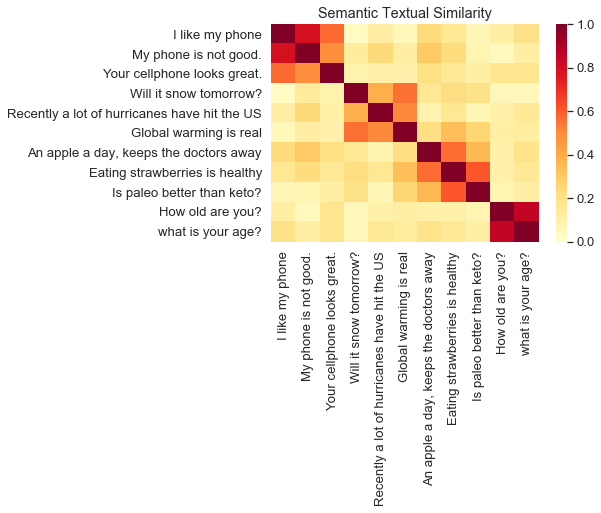

In [9]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, messages,
               similarity_message_encodings)

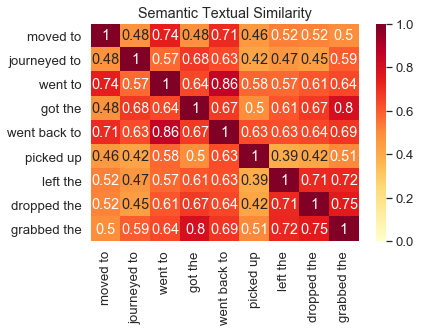

In [13]:
messages = [
    # bAbI
    "moved to",
    "journeyed to",
    "went to",
    "got the",
    "went back to",
    "picked up",
    "left the",
    "dropped the",
    "grabbed the"
]

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, messages,
               similarity_message_encodings)

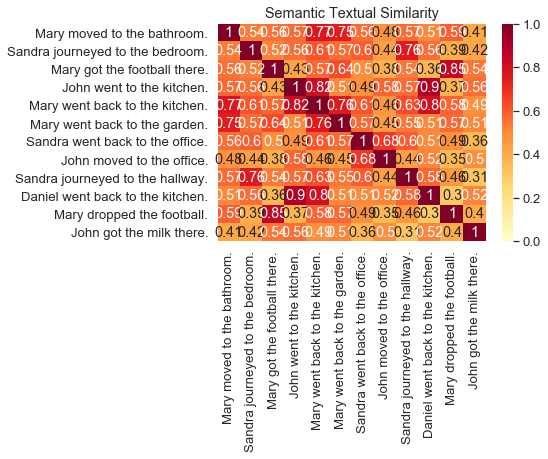

In [14]:
messages = [
    # bAbI
    "Mary moved to the bathroom.",
    "Sandra journeyed to the bedroom.",
    "Mary got the football there.",
    "John went to the kitchen.",
    "Mary went back to the kitchen.",
    "Mary went back to the garden.",
    "Sandra went back to the office.",
    "John moved to the office.",
    "Sandra journeyed to the hallway.",
    "Daniel went back to the kitchen.",
    "Mary dropped the football.",
    "John got the milk there."

]

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, messages,
               similarity_message_encodings)

In [5]:
import hashlib

In [6]:
handle = "https://tfhub.dev/google/universal-sentence-encoder/2"
hashlib.sha1(handle.encode("utf8")).hexdigest()

'1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47'